In [ ]:
# NIM/Nama	  	: 16520002/Eraraya Morenzo Muten
# Tanggal	  	  : 16 Desember 2020
# Shift/Kelas	  : 3.1/A

# Problem 3

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Membaca File CSV

In [ ]:
# membaca file csv pada directory yang sama dengan notebook ini sebagai DataFrame Pandas
df = pd.read_csv('crypto.csv')

Nomor 1

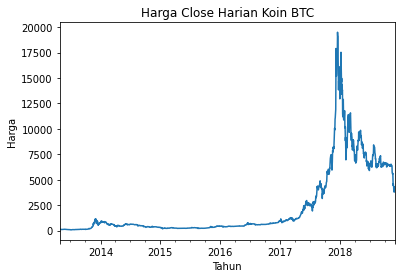

In [ ]:
# membuat DataFrame baru dengan nilai kolom date sebagai indeksnya
df2 = df
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
# pada data ini, tanggal untuk tiap jenis cryptocurrency sudah diurutkan berdasarkan tanggal
# membuat line chart untuk harga BTC setiap harinya dengan nilai close sebagai nilai harian
line = df2.loc[df2['name']=='BTC']['close'].plot(kind='line')
# menamai judul grafik
line.set_title('Harga Close Harian Koin BTC')
# menamai sumbu x
line.set_xlabel('Tahun')
# menamai sumbu y
line.set_ylabel('Harga')
# menampilkan grafik
plt.show()

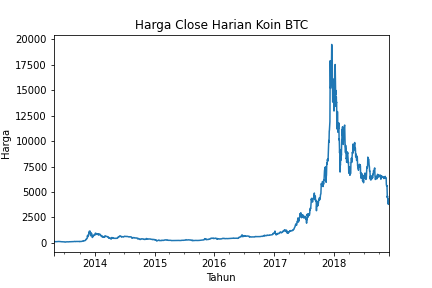

Nomor 2

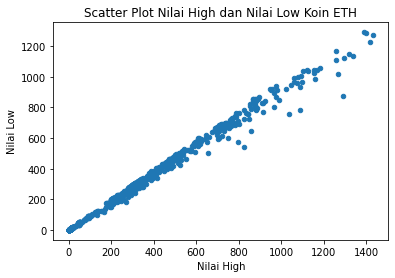

In [ ]:
# membuat Scatter plot dengan nilai high sebagai sumbu x dan nilai low sebagai sumbu y untuk koin ETH
scatter = df.loc[df['name']=='ETH'].plot(kind='scatter', x='high', y='low')
# menamai judul grafik
scatter.set_title('Scatter Plot Nilai High dan Nilai Low Koin ETH')
# menamai sumbu x
scatter.set_xlabel('Nilai High')
# menamai sumbu y
scatter.set_ylabel('Nilai Low')
# menampilkan grafik
plt.show()

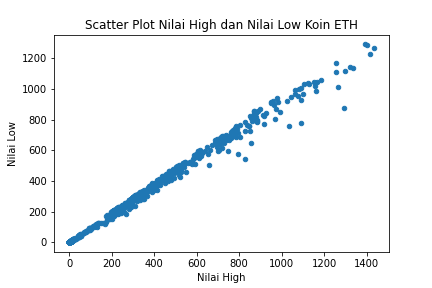

Nomor 3

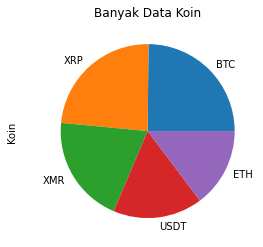

In [ ]:
# membuat DataFrame nama koin dan banyak datanya
df_koin = df['name'].value_counts()

# membuat diagram pie banyaknya data dari masing-masing koin
pie = df_koin.plot(kind='pie')
# menamai judul grafik
pie.set_title('Banyak Data Koin')
# menghilangkan nama sumbu y
pie.set_ylabel('Koin')
# mengatur posisi nama sumbu y
pie.yaxis.set_label_coords(-0.1,0.5)
# menampilkan grafik
plt.show()

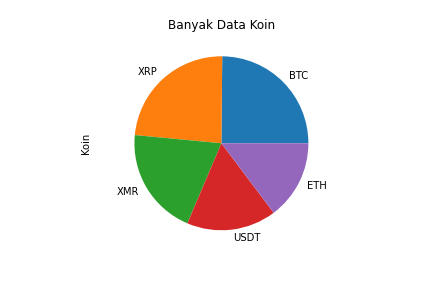

Nomor 4

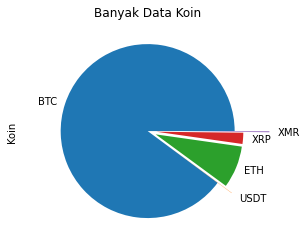

In [ ]:
# membuat DataFrame baru yang hanya memuat data kolom name dan market pada tanggal 4 Juli 2016
# pada data ini, tanggal 4 Juli 2016 ditulis sebagai 2016-07-04
df3 = df.loc[df['date']=='2016-07-04'][['name', 'market']]
# menukar posisi dua baris agar visualisasi diagram pie lebih baik
USDT, XRP = df3.iloc[3].copy(), df3.iloc[1].copy()
df3.iloc[3],df3.iloc[1] = XRP, USDT

# menyimpan nama koin sebagai variabel labels
labels = df3['name']
# menyimpan jarak pisah sebagai variabel explode
explode = (0, 0.2, 0.1, 0.1, 0.4)

# membuat diagram pie nilai kapitalisasi pasar semua mata uang pada tanggal 4 Juli 2016
# menamai nilai kapitalisasi pasar sesuai dengan variabel labels
# memisahkan juring sesuai dengan jarak variabel explode
pie = df3['market'].plot(kind='pie', labels=labels, explode=explode)
# menamai judul grafik
pie.set_title('Banyak Data Koin')
# menghilangkan nama sumbu y
pie.set_ylabel('Koin')
# mengatur posisi nama sumbu y
pie.yaxis.set_label_coords(-0.1,0.5)
# menampilkan grafik
plt.show()

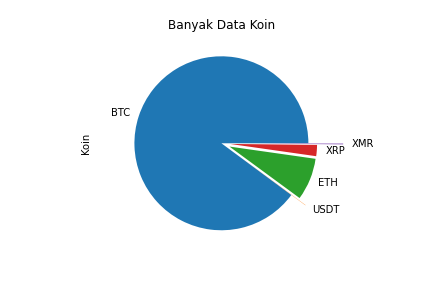

Nomor 5

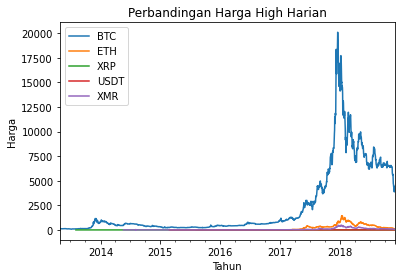

In [ ]:
# membuat DataFrame baru untuk setiap jenis koin
df_BTC = df.loc[df['name']=='BTC'].reset_index()[['date', 'high']].rename(columns = {'high':'BTC'})
df_ETH = df.loc[df['name']=='ETH'].reset_index()[['date', 'high']].rename(columns = {'high':'ETH'})
df_XRP = df.loc[df['name']=='XRP'].reset_index()[['date', 'high']].rename(columns = {'high':'XRP'})
df_USDT = df.loc[df['name']=='USDT'].reset_index()[['date', 'high']].rename(columns = {'high':'USDT'})
df_XMR = df.loc[df['name']=='XMR'].reset_index()[['date', 'high']].rename(columns = {'high':'XMR'})

# menggabungkan semua DataFrame berdasarkan nilai date
df_high = df_BTC.merge(df_ETH, how='outer', on='date', sort='date')
df_high = df_high.merge(df_XRP, how='outer', on='date', sort='date')
df_high = df_high.merge(df_USDT, how='outer', on='date', sort='date')
df_high = df_high.merge(df_XMR, how='outer', on='date', sort='date')
df_high.fillna(method='pad', inplace=True)  # or df.interpolate(inplace=True)

# pada data ini, tanggal untuk tiap jenis cryptocurrency sudah diurutkan berdasarkan tanggal
# membuat line chart untuk membandingkan nilai high BTC, ETH, XRP, USDT dan XMR.
line2 = df_high.plot(kind='line', x = 'date', y=['BTC', 'ETH', 'XRP', 'USDT', 'XMR'])
# menamai judul grafik
line2.set_title('Perbandingan Harga High Harian')
# menamai sumbu x
line2.set_xlabel('Tahun')
# menamai sumbu y
line2.set_ylabel('Harga')
# menampilkan grafik
plt.show()

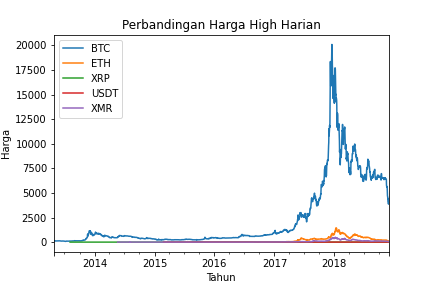

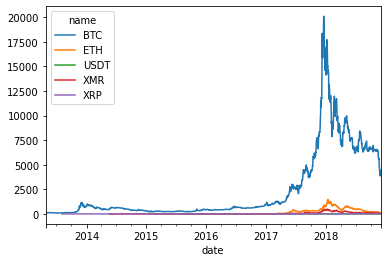

In [20]:
# alternatif
df.groupby(["date", "name"])["high"].sum().unstack().plot(kind='line')